# EXPLORATORY DATA ANALYSIS (EDA)
<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

In [1]:
import sys
import json
import random
import operator
import numpy as np
import pandas as pd
import seaborn as sns
from afinn import Afinn
import matplotlib as mpl
from string import punctuation
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import FloatProgress

from functions import (func_jsonParser,
                       fun_countplot,
                       fun_hist)

#-----------------------------------------------------------------------------------------------------------------#

#Main python/module versions used here for reference
print('python:', sys.version, '\n')
print('pandas:    ', pd.__version__)
print('seaborn:   ', sns.__version__)
print('numpy:     ', np.__version__)
print('matplotlib:', mpl.__version__)
print('json:      ', json.__version__)

python: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

pandas:     0.25.0
seaborn:    0.9.0
numpy:      1.16.4
matplotlib: 3.1.0
json:       2.0.9


<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### MAIN CUSTOMIZABLE VARIABLES

In [2]:
CHUNK_SIZE = 1e4    #=> (int) number of rows/lines to read per iteration within the function "read_json"
CHUNKS_NUM = 50     #=> (int) number of iterations to read within the function "read_json"
OCCURRENCE_NUM = 10 #=> (int) minimum occurences of each word to be considered as relevant for word polarity detection

<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### CHECKING THE NUMBER OF RECORDS ON EACH DATASET

In [3]:
%%time
print("USER DATASET (# records):     {}".format(sum(1 for _ in open('yelp_dataset/user.json'))))
print("BUSINESS DATASET (# records): {}".format(sum(1 for _ in open('yelp_dataset/business.json'))))
print("CHECKIN DATASET (# records):  {}".format(sum(1 for _ in open('yelp_dataset/checkin.json'))))
print("TIP DATASET (# records):      {}".format(sum(1 for _ in open('yelp_dataset/tip.json'))))
print("PHOTO DATASET (# records):    {}".format(sum(1 for _ in open('yelp_dataset/photo.json'))))
print("REVIEW DATASET (# records):   {}".format(sum(1 for _ in open('yelp_dataset/review.json'))))

USER DATASET (# records):     1637138
BUSINESS DATASET (# records): 192609
CHECKIN DATASET (# records):  161950
TIP DATASET (# records):      1223094
PHOTO DATASET (# records):    200000
REVIEW DATASET (# records):   6685900
CPU times: user 13.5 s, sys: 5.82 s, total: 19.3 s
Wall time: 21.7 s


<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### LOADING AND CHECKING THE BUSINESS DATASET

In [18]:
df_businesses = func_jsonParser(file = 'yelp_dataset/business.json')
print('Dataset business loaded ...\n')

print(">> BUSINESS (shape): {}\n".format(df_businesses.shape))
print(">> COLUMN NAMES: {}\n".format(df_businesses.columns.tolist()))

display(df_businesses.head(5))

Dataset business loaded ...

>> BUSINESS (shape): (192609, 14)

>> COLUMN NAMES: ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


<hr style="width:100%; height:10px; border:none; color:#ffffff; background-color:#000000;">

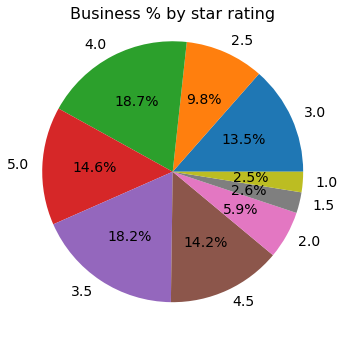

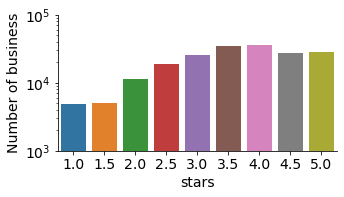

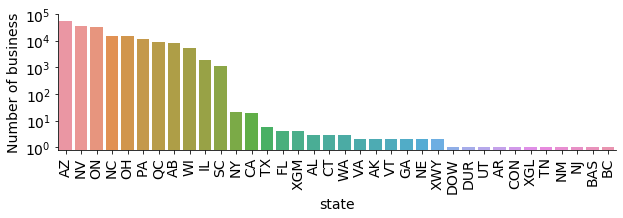

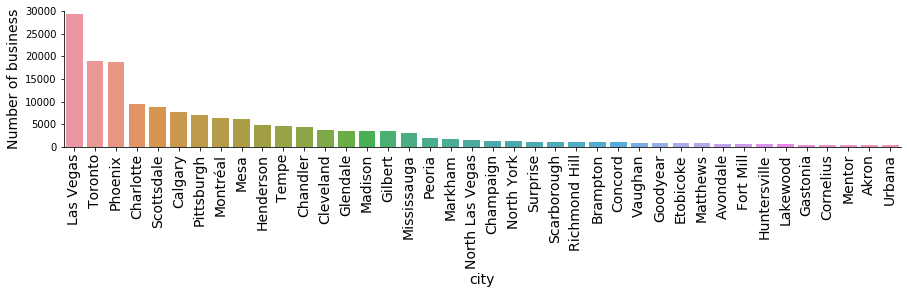

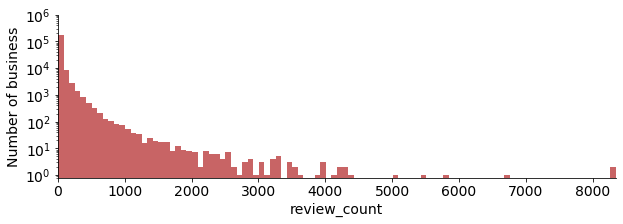

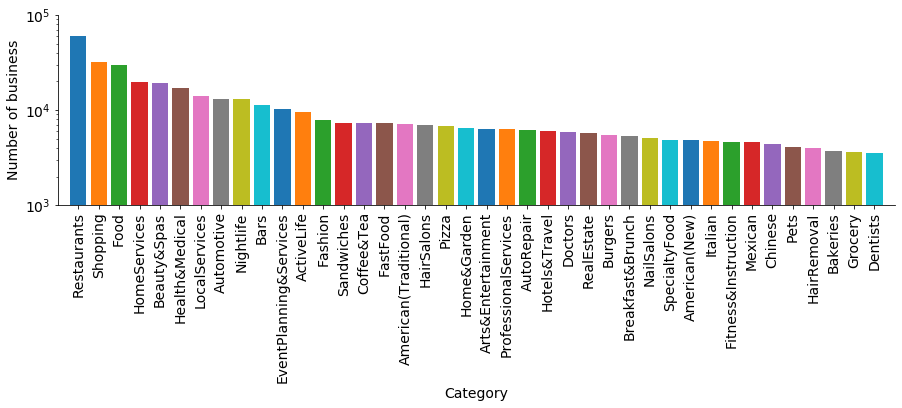

In [5]:
#percentage of business by star-based rating

stars_dist = []
for s in df_businesses['stars'].unique():
    stars_dist.append(len(df_businesses.loc[df_businesses['stars'] == s, 'business_id']) / df_businesses.shape[0])

fig = plt.figure(figsize = (6,6))

plt.pie(stars_dist, labels = df_businesses['stars'].unique(), autopct = '%1.1f%%', startangle = 0, 
        textprops = {'fontsize': 14})

plt.title('Business % by star rating', fontsize = 16, y = 0.95)
plt.show()

#--------------------------------------------------------------------------------------------------------------------#

#number of business by star-based rating
fun_countplot(data = df_businesses['stars'], xlabel = 'stars', ylabel = 'Number of business', fig_width = 5, 
              fig_height = 2.5, fig_miny = 1e3, fig_maxy = 1e5, fig_sort = False)

#--------------------------------------------------------------------------------------------------------------------#

#states sorted by number of business 
fun_countplot(data = df_businesses['state'], xlabel = 'state', ylabel = 'Number of business', fig_width = 10, 
              fig_height = 2.5, fig_miny = 8e-1, fig_maxy = 1e5, fig_ticksr = 90)

#--------------------------------------------------------------------------------------------------------------------#

#top 40 cities with more business
city_counts = df_businesses['city'].value_counts()
cities_plot = city_counts.index[0:40]

ds = df_businesses[df_businesses['city'].isin(cities_plot)]['city']
df = pd.DataFrame({'city': ds.values})

fun_countplot(data = df['city'], xlabel = 'city', ylabel = 'Number of business', fig_width = 15, fig_height = 2.5, 
              fig_miny = 0, fig_maxy = 3e4, fig_ticksr = 90, fig_log = False)

#--------------------------------------------------------------------------------------------------------------------#

df = df_businesses.groupby(['review_count']).size().to_frame('count').reset_index()
print("~{}% of business received less than 50 reviews.".format(np.round(100 * (len(df.loc[df['count'] < 50, 'review_count']) / 
                                                                                   df.shape[0]))))

fun_hist(data = df_businesses['review_count'], xlabel = 'review_count', ylabel = 'Number of business', n_bins = 100, 
         fig_width = 10, fig_height = 3.0, fig_miny = 8e-1, fig_maxy = 1e6)

#--------------------------------------------------------------------------------------------------------------------#

#top 40 categories to which more business belong
categories = {}
for cat in df_businesses['categories']:
    
    if cat != None:
        for s in cat.split(','):
            s = s.replace(' ', '')
            if s not in categories.keys():
                categories[s] = 0
            else:
                categories[s] += 1

sorted_cats = sorted(categories.items(), key = operator.itemgetter(1), reverse = True)

fig, ax = plt.subplots(figsize = (15, 3.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yscale('log')

cats_names = []
for i, cat_val in enumerate(sorted_cats[0:40]):
    plt.bar(i, cat_val[1])
    cats_names.append(cat_val[0])

plt.xlabel('Category', fontsize = 14)
plt.ylabel('Number of business', fontsize = 14)

plt.xticks(np.arange(0, len(cats_names), 1), cats_names, rotation = 90, fontsize = 14)
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], fontsize = 14)

plt.xlim(-1, len(cats_names))
plt.ylim(1e3, 1e5)

plt.show()
del df_businesses

<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### LOADING AND CHECKING THE TIP DATASET

In [6]:
df_tips = func_jsonParser(file = 'yelp_dataset/tip.json', chunk_size = CHUNK_SIZE, chunks_num = CHUNKS_NUM)
print('Dataset tip loaded ...\n')

print(">> TIP (shape): {}\n".format(df_tips.shape))
print(">> COLUMN NAMES: {}\n".format(df_tips.columns.tolist()))

display(df_tips.head(5))

Dataset tip loaded ...

>> TIP (shape): (500000, 5)

>> COLUMN NAMES: ['user_id', 'business_id', 'text', 'date', 'compliment_count']



,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


<hr style="width:100%; height:10px; border:none; color:#ffffff; background-color:#000000;">

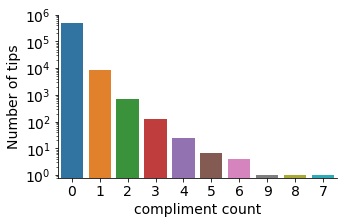

~84.0% of users wrote less than 10 tips.


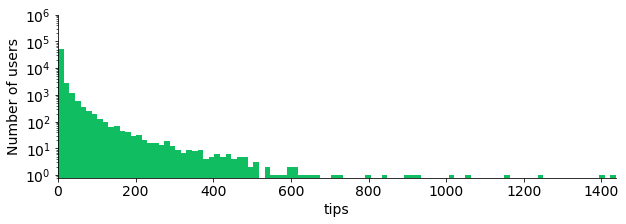

~87.0% of businesses received less than 10 tips.


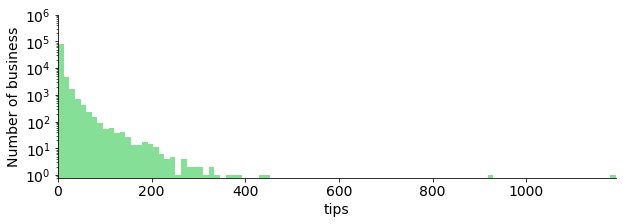

In [7]:
fun_countplot(data = df_tips['compliment_count'], 
              xlabel = 'compliment count', 
              ylabel = 'Number of tips',
              fig_width = 5, 
              fig_height = 3,
              fig_miny = 8e-1,
              fig_maxy = 1e6)

#--------------------------------------------------------------------------------------------------------------------#

df = df_tips.groupby(['user_id']).size().to_frame('count').reset_index()
print("~{}% of users wrote less than 10 tips.".format(np.round(100 * (len(df.loc[df['count'] < 10, 'user_id']) / 
                                                                         df.shape[0]))))

fun_hist(data = df['count'], xlabel = 'tips', ylabel = 'Number of users', n_bins = 100, 
         fig_width = 10, fig_height = 3.0, fig_miny = 8e-1, fig_maxy = 1e6)

#--------------------------------------------------------------------------------------------------------------------#

df = df_tips.groupby(['business_id']).size().to_frame('count').reset_index()
print("~{}% of businesses received less than 10 tips.".format(np.round(100 * (len(df.loc[df['count'] < 10, 'business_id']) / 
                                                                                  df.shape[0]))))

fun_hist(data = df['count'], xlabel = 'tips', ylabel = 'Number of business', n_bins = 100, 
         fig_width = 10, fig_height = 3.0, fig_miny = 8e-1, fig_maxy = 1e6)

del df_tips, df

<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### LOADING AND CHECKING THE PHOTO DATASET

In [8]:
df_photos = func_jsonParser(file = 'yelp_dataset/photo.json')
print('Dataset photo loaded ...\n')

print(">> PHOTO (shape): {}\n".format(df_photos.shape))
print(">> COLUMN NAMES: {}\n".format(df_photos.columns.tolist()))

display(df_photos.head(5))

Dataset photo loaded ...

>> PHOTO (shape): (200000, 4)

>> COLUMN NAMES: ['caption', 'photo_id', 'business_id', 'label']



,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food
3,,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside
4,,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside


<hr style="width:100%; height:10px; border:none; color:#ffffff; background-color:#000000;">

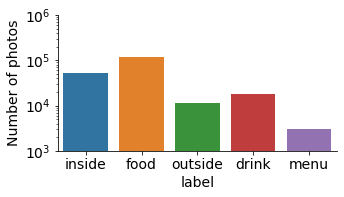

~62.0% of businesses have less than 5 photos.


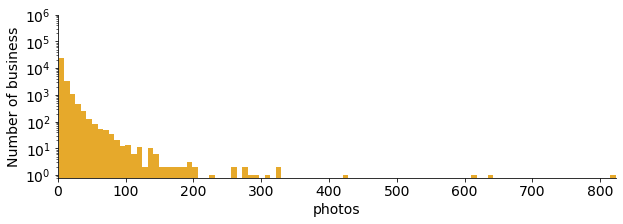

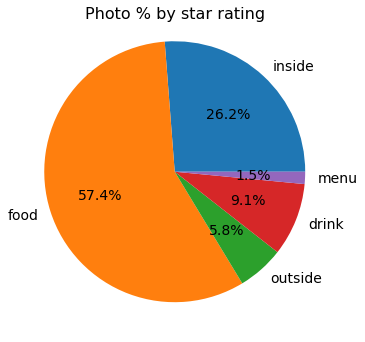

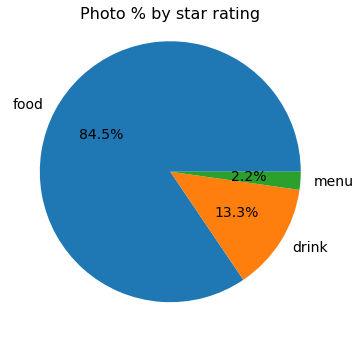

food     22975
drink    18121
menu      3023
Name: label, dtype: int64


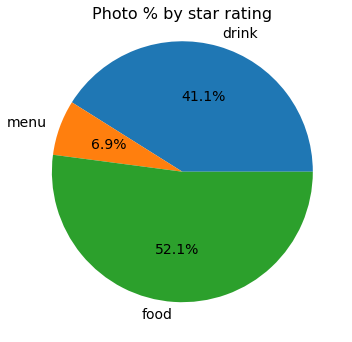

In [9]:
#number of photos by label

fun_countplot(data = df_photos['label'], 
              xlabel = 'label',
              ylabel = 'Number of photos',
              fig_width = 5, 
              fig_height = 2.5,
              fig_miny = 1e3,
              fig_maxy = 1e6, 
              fig_sort = False)

#--------------------------------------------------------------------------------------------------------------------#

df = df_photos.groupby(['business_id']).size().to_frame('count').reset_index()
print("~{}% of businesses have less than 5 photos.".format(np.round(100*(len(df.loc[df['count'] < 5, 'business_id']) /
                                                                                df.shape[0]))))

fun_hist(data = df['count'], xlabel = 'photos', ylabel = 'Number of business', n_bins = 100, 
         fig_width = 10, fig_height = 3.0, fig_miny = 8e-1, fig_maxy = 1e6)

#--------------------------------------------------------------------------------------------------------------------#

#percentage of photos belonging to each of all labels

labels_dist = []
for lab in df_photos['label'].unique():
    labels_dist.append(len(df_photos.loc[df_photos['label'] == lab, 'photo_id']) / df_photos.shape[0])

fig = plt.figure(figsize = (6,6))

plt.pie(labels_dist, labels = df_photos['label'].unique(), autopct = '%1.1f%%', startangle = 0, 
        textprops = {'fontsize': 14})

plt.title('Photo % by star rating', fontsize = 16, y = 0.95)
plt.show()

#--------------------------------------------------------------------------------------------------------------------#

#percentage of photos belonging to only food, drink and menu labels

df_photos = df_photos[~df_photos['label'].isin(['inside', 'outside'])]

labels_dist = []
for lab in df_photos['label'].unique():
    labels_dist.append(len(df_photos.loc[df_photos['label'] == lab, 'photo_id']) / df_photos.shape[0])

fig = plt.figure(figsize = (6,6))

plt.pie(labels_dist, labels = df_photos['label'].unique(), autopct = '%1.1f%%', startangle = 0, 
        textprops = {'fontsize': 14})

plt.title('Photo % by star rating', fontsize = 16, y = 0.95)
plt.show()

#--------------------------------------------------------------------------------------------------------------------#
# removing a certain amount of photos with label = 'food' to address the problem of unbalance. This is just one of 
# many possible techniques to tackle this problem, although I am not addressing this issue in this exercise.

rows_drop = int(len(df_photos.loc[df_photos['label'] == 'food', 'photo_id']) / 1.25)
indexes_drop = df_photos.loc[df_photos['label'] == 'food'].index[0:rows_drop]

df_photos.drop(indexes_drop, inplace = True)
print(df_photos['label'].value_counts())

labels_dist = []
for lab in df_photos['label'].unique():
    labels_dist.append(len(df_photos.loc[df_photos['label'] == lab, 'photo_id']) / df_photos.shape[0])

fig = plt.figure(figsize = (6,6))

plt.pie(labels_dist, labels = df_photos['label'].unique(), autopct = '%1.1f%%', startangle = 0, 
        textprops = {'fontsize': 14})

plt.title('Photo % by star rating', fontsize = 16, y = 0.95)
plt.show()

del df_photos

<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### LOADING AND CHECKING THE USER DATASET

In [10]:
df_users = func_jsonParser(file = 'yelp_dataset/user.json', chunk_size = CHUNK_SIZE, chunks_num = CHUNKS_NUM)
print('Dataset users loaded ...\n')

print(">> USER (shape): {}\n".format(df_users.shape))
print(">> COLUMN NAMES: {}\n".format(df_users.columns.tolist()))

display(df_users.head(5))

Dataset users loaded ...

>> USER (shape): (500000, 22)

>> COLUMN NAMES: ['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,...,1,0,0,1,16,57,80,80,25,5


<hr style="width:100%; height:10px; border:none; color:#ffffff; background-color:#000000;">

~50.0% of users wrote less than 10 reviews.


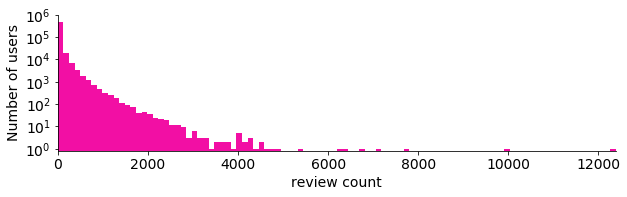

~94.0% of users wrote less than 5 compliment notes.


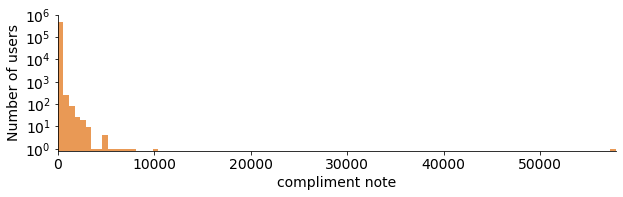

~91.0% of users have less than 5 fans.


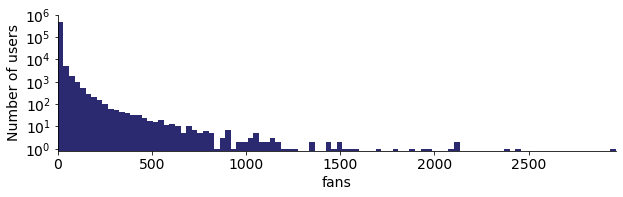

In [11]:
print("~{}% of users wrote less than 10 reviews.".format(np.round(100 * (len(df_users.loc[df_users['review_count'] < 10, 'user_id']) / 
                                                                             df_users.shape[0]))))

fun_hist(data = df_users['review_count'], xlabel = 'review count', ylabel = 'Number of users', n_bins = 100, 
         fig_width = 10, fig_height = 2.5, fig_miny = 8e-1, fig_maxy = 1e6)

#--------------------------------------------------------------------------------------------------------------------#

print("~{}% of users wrote less than 5 compliment notes.".format(np.round(100 * (len(df_users.loc[df_users['compliment_note'] < 5, 'user_id']) / 
                                                                                     df_users.shape[0]))))

fun_hist(data = df_users['compliment_note'], xlabel = 'compliment note', ylabel = 'Number of users', n_bins = 100, 
         fig_width = 10, fig_height = 2.5, fig_miny = 8e-1, fig_maxy = 1e6)

#--------------------------------------------------------------------------------------------------------------------#

print("~{}% of users have less than 5 fans.".format(np.round(100 * (len(df_users.loc[df_users['fans'] < 5, 'user_id']) / 
                                                                                     df_users.shape[0]))))

fun_hist(data = df_users['fans'], xlabel = 'fans', ylabel = 'Number of users', n_bins = 100, 
         fig_width = 10, fig_height = 2.5, fig_miny = 8e-1, fig_maxy = 1e6)

del df_users

<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### LOADING AND CHECKING THE CHECKIN DATASET

In [12]:
df_checkins = func_jsonParser(file = 'yelp_dataset/checkin.json')
print('Dataset checkin loaded ...\n')

print(">> CHECKIN (shape): {}\n".format(df_checkins.shape))
print(">> COLUMN NAMES: {}\n".format(df_checkins.columns.tolist()))

display(df_checkins.head(5))
del df_checkins

Dataset checkin loaded ...

>> CHECKIN (shape): (161950, 2)

>> COLUMN NAMES: ['business_id', 'date']



,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">

### LOADING AND CHECKING THE REVIEW DATASET

In [13]:
df_reviews = func_jsonParser(file = 'yelp_dataset/review.json', chunk_size = CHUNK_SIZE, chunks_num = CHUNKS_NUM)
print('Dataset review loaded ...\n')

print(">> REVIEW (shape): {}\n".format(df_reviews.shape))
print(">> COLUMN NAMES: {}\n".format(df_reviews.columns.tolist()))

display(df_reviews.head(5))

Dataset review loaded ...

>> REVIEW (shape): (500000, 9)

>> COLUMN NAMES: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']



,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


<hr style="width:100%; height:10px; border:none; color:#ffffff; background-color:#000000;">

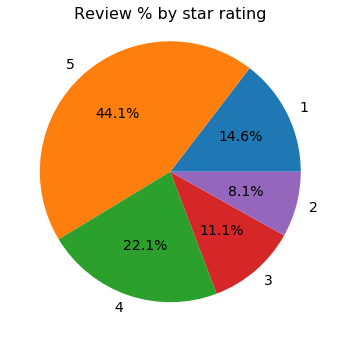

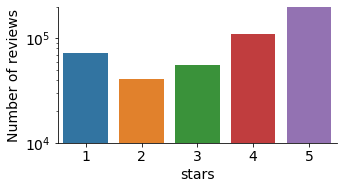

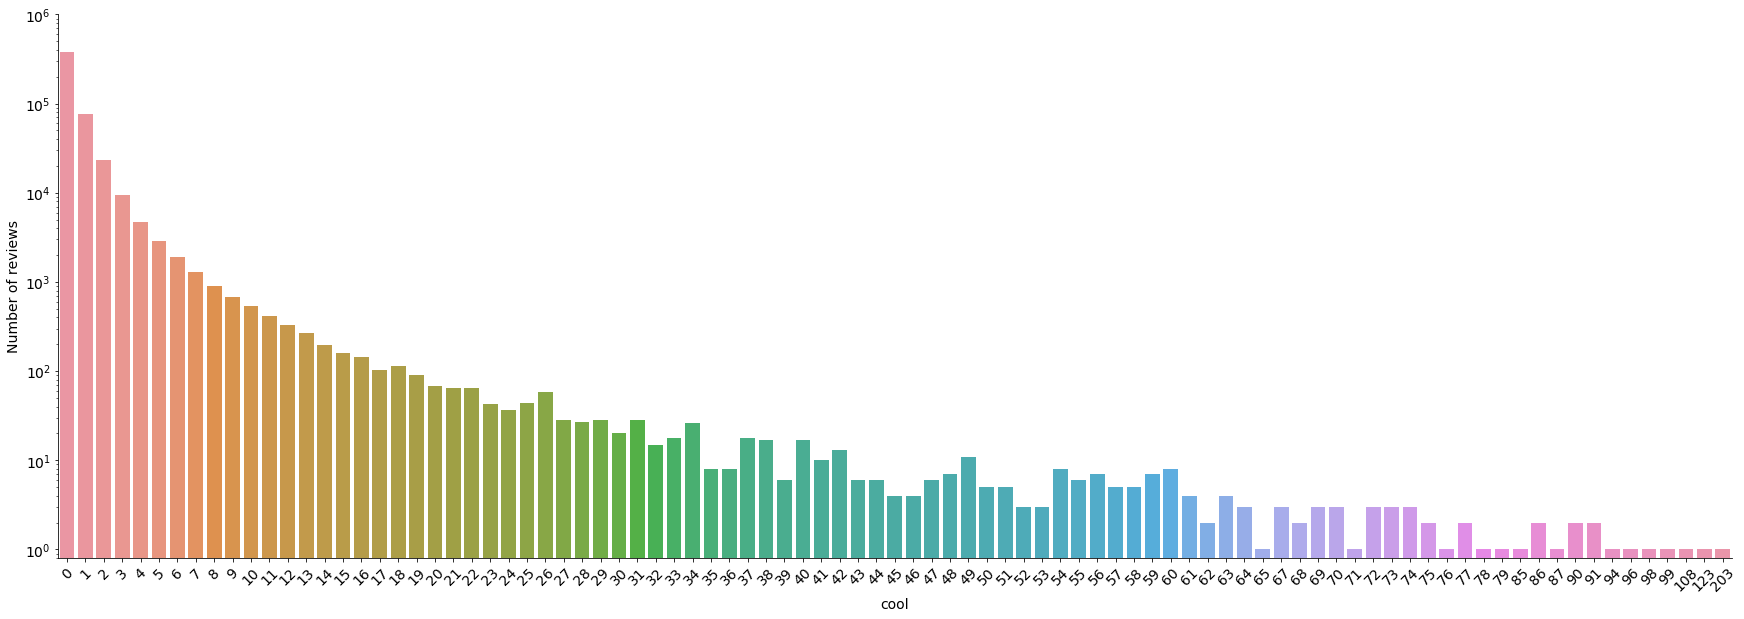

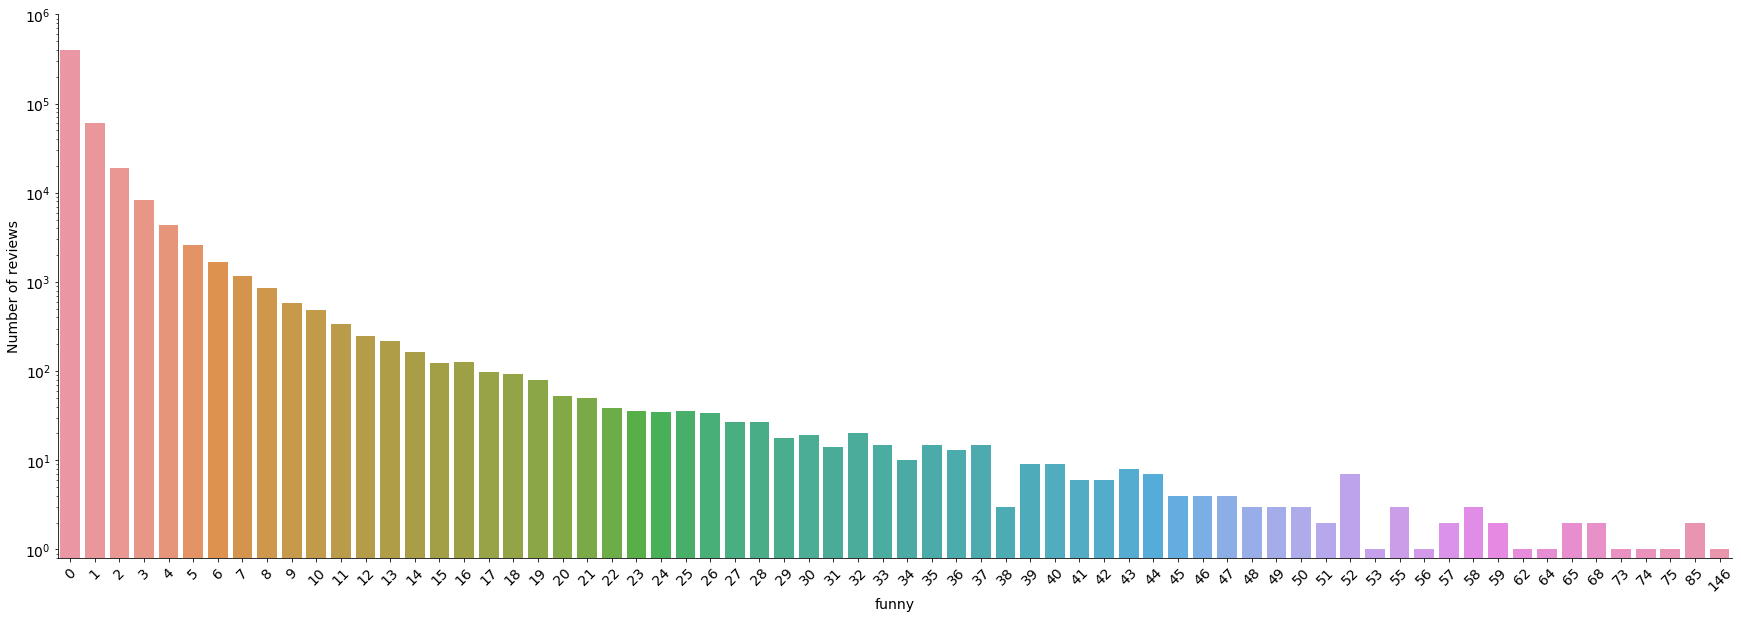

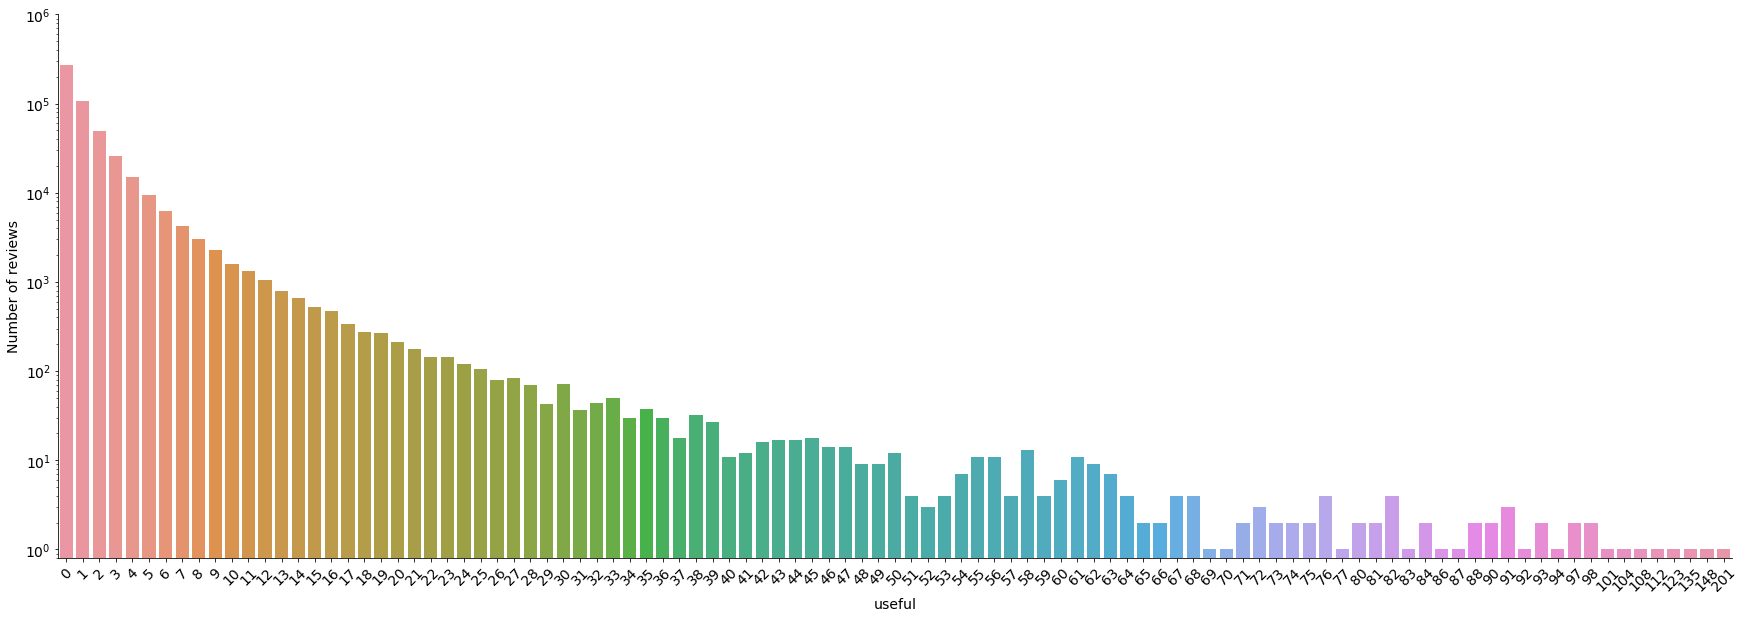

In [14]:
#percentage of reviews by star-based rating

stars_dist = []
for s in df_reviews['stars'].unique():
    stars_dist.append(len(df_reviews.loc[df_reviews['stars'] == s, 'review_id']) / df_reviews.shape[0])

fig = plt.figure(figsize = (6,6))

plt.pie(stars_dist, labels = df_reviews['stars'].unique(), autopct = '%1.1f%%', startangle = 0, 
        textprops = {'fontsize': 14})

plt.title('Review % by star rating', fontsize = 16, y = 0.95)
plt.show()

#--------------------------------------------------------------------------------------------------------------------#

columns_plot  = ['stars', 'cool', 'funny', 'useful']
subplot_miny  = [1e4, 8e-1, 8e-1, 8e-1]
subplot_maxy  = [2e5, 1e6, 1e6, 1e6]
figure_width  = [5, 30, 30, 30]
figure_height = [2.5, 10, 10, 10]
figure_ticksr = [0, 45, 45, 45]

for i in range(len(columns_plot)):
    
    fun_countplot(data = df_reviews[columns_plot[i]], 
                  xlabel = columns_plot[i], 
                  ylabel = 'Number of reviews', 
                  fig_width = figure_width[i], 
                  fig_height =  figure_height[i],
                  fig_miny = subplot_miny[i],
                  fig_maxy = subplot_maxy[i],
                  fig_ticksr = figure_ticksr[i], 
                  fig_sort = False)

<hr style="width:100%; height:50px; border:none; color:#ffffff; background-color:#000000;">

### ACCURACY EVALUATION BASED ON A LEXICON MODEL (classification of review texts as + or -)

In [15]:
af_model = Afinn(language = 'en', emoticons = True)

pb = FloatProgress(min = 0, max = (df_reviews.shape[0] - 1))
display(pb)

preds = 0
for index, row in df_reviews.iterrows():
    
    score = af_model.score(row['text'])
    
    if (score < 0 and row['stars'] <= 3) or (score > 0 and row['stars'] > 3):
        preds += 1
        
    pb.value += 1

print("Accuracy: {}".format(np.round(preds / df_reviews.shape[0], 2)))

FloatProgress(value=0.0, max=499999.0)

Accuracy: 0.75


<hr style="width:100%; height:10px; border:none; color:#ffffff; background-color:#000000;">

### USING A LEXICON-BASED MODEL TO FIND THE MOST POLARIZED WORDS ON REVIEWS OF A BUSINESS. 

- COMMENT: I randomly selected only two businesses for ilustrative purposes. Of course, we can easily iterate over all business in the dataset to provide results for each of them). 

In [16]:
business_ids = ['zPxWTy_2WOslWtKCr8B1nQ', 'SVGApDPNdpFlEjwRQThCxA']

for bid in business_ids:
    
    df = df_reviews.loc[df_reviews['business_id'] == bid, 'text']
    df = pd.DataFrame({'text': df.values})

    print("Avg. rating: {}".format(np.round(np.mean(df_reviews.loc[df_reviews['business_id'] == bid, 'stars']), 2)))
    print("Number of reviews: {}".format(df.shape[0]))

    #----------------------------------------------------------------------------------------------------------------#

    scores, words = [], []
    for i,t in enumerate(df['text']):

        t = ''.join(c for c in t.lower() if c not in punctuation)
        t = t.replace('\n', ' ')

        for word in t.split(' '):

            if word != ' ':
                score = af_model.score(word)

                if score != 0:
                    scores.append(score)
                    words.append(word)

    #----------------------------------------------------------------------------------------------------------------#

    df_output = pd.DataFrame(list(zip(scores, words)), columns = ['score', 'word'])

    words_remove = []
    for word, occurr in zip(df_output['word'].value_counts().index, df_output['word'].value_counts().values):

        if occurr < OCCURRENCE_NUM:
            words_remove.append(word)

    #----------------------------------------------------------------------------------------------------------------#

    df_output = df_output[~df_output['word'].isin(words_remove)]
    df_output = df_output.groupby(['word','score']).size().to_frame('count').reset_index()
    df_output = df_output.reindex(df_output['score'].abs().sort_values(ascending = False).index)
    display(df_output.head(15))

Avg. rating: 1.11
Number of reviews: 311


,word,score,count
16,hell,-4.0,15
27,lost,-3.0,38
43,worst,-3.0,70
1,awful,-3.0,17
2,bad,-3.0,31
40,terrible,-3.0,30
14,good,3.0,29
15,hate,-3.0,14
19,horrible,-3.0,34
30,nice,3.0,13


Avg. rating: 4.59
Number of reviews: 1377


,word,score,count
72,outstanding,5.0,35
97,superb,5.0,13
43,funny,4.0,14
1,amazing,4.0,309
112,wow,4.0,49
2,awesome,4.0,179
32,fantastic,4.0,98
109,wonderful,4.0,62
42,fun,4.0,59
29,fabulous,4.0,15


<hr style="width:100%; height:20px; border:none; color:#ffffff; background-color:#000000;">